In [1]:
import keras, os
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

Using TensorFlow backend.


In [2]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory='D:/Backup_data/jongkeun/dir_images/traindata/', target_size=(128,128))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory='D:/Backup_data/jongkeun/dir_images/testdata/', target_size=(128,128))

Found 9182 images belonging to 3 classes.
Found 1018 images belonging to 3 classes.


In [3]:
model = Sequential()

W0106 15:44:10.802671 11136 deprecation_wrapper.py:119] From C:\Users\whdrm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [4]:
model.add(Conv2D(input_shape=(128,128,3),filters=8,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(rate=0.7))

model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(rate=0.7))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(rate=0.7))

model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(rate=0.7))

model.add(Conv2D(filters=1024,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(rate=0.7))

model.add(Flatten())
model.add(Dense(units=1024,activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(units=512,activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(units=3, activation="softmax"))

W0106 15:44:11.547652 11136 deprecation_wrapper.py:119] From C:\Users\whdrm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0106 15:44:11.549646 11136 deprecation_wrapper.py:119] From C:\Users\whdrm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0106 15:44:11.571613 11136 deprecation_wrapper.py:119] From C:\Users\whdrm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0106 15:44:11.574580 11136 deprecation_wrapper.py:119] From C:\Users\whdrm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0106 15:44:11.580565 11136 deprecation.py:506] From C:\Users\wh

In [5]:
from keras.optimizers import Adam
opt = Adam(lr=1e-5)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

W0106 15:44:13.742804 11136 deprecation_wrapper.py:119] From C:\Users\whdrm\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0106 15:44:13.748790 11136 deprecation_wrapper.py:119] From C:\Users\whdrm\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 8)       224       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 128)     9344      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 256)       295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 256)       590080    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 256)       0         
__________

In [9]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("200106_total16", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
# early = EarlyStopping(monitor='acc', patience=20, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=100,generator=traindata, validation_data= testdata, validation_steps=10,epochs=500,callbacks=[checkpoint])

Epoch 1/500
100/100 [==============================] - 76s 758ms/step - loss: 0.6266 - acc: 0.7079 - val_loss: 0.6824 - val_acc: 0.7611

Epoch 00001: val_acc improved from -inf to 0.76115, saving model to 200106_total16
Epoch 2/500
100/100 [==============================] - 51s 514ms/step - loss: 0.6074 - acc: 0.7200 - val_loss: 0.7173 - val_acc: 0.7312

Epoch 00002: val_acc did not improve from 0.76115
Epoch 3/500
100/100 [==============================] - 57s 573ms/step - loss: 0.6211 - acc: 0.7137 - val_loss: 0.7235 - val_acc: 0.7000

Epoch 00003: val_acc did not improve from 0.76115
Epoch 4/500
100/100 [==============================] - 75s 752ms/step - loss: 0.6209 - acc: 0.7133 - val_loss: 0.7366 - val_acc: 0.7188

Epoch 00004: val_acc did not improve from 0.76115
Epoch 5/500
100/100 [==============================] - 49s 486ms/step - loss: 0.6317 - acc: 0.6988 - val_loss: 0.7348 - val_acc: 0.7070

Epoch 00005: val_acc did not improve from 0.76115
Epoch 6/500
100/100 [===========

100/100 [==============================] - 66s 656ms/step - loss: 0.5833 - acc: 0.7472 - val_loss: 0.5397 - val_acc: 0.7312

Epoch 00044: val_acc did not improve from 0.77389
Epoch 45/500
100/100 [==============================] - 49s 488ms/step - loss: 0.5760 - acc: 0.7524 - val_loss: 0.5662 - val_acc: 0.7562

Epoch 00045: val_acc did not improve from 0.77389
Epoch 46/500
100/100 [==============================] - 52s 520ms/step - loss: 0.5892 - acc: 0.7447 - val_loss: 0.5530 - val_acc: 0.7675

Epoch 00046: val_acc did not improve from 0.77389
Epoch 47/500
100/100 [==============================] - 67s 674ms/step - loss: 0.5642 - acc: 0.7567 - val_loss: 0.5727 - val_acc: 0.7469

Epoch 00047: val_acc did not improve from 0.77389
Epoch 48/500
100/100 [==============================] - 49s 487ms/step - loss: 0.5818 - acc: 0.7553 - val_loss: 0.5262 - val_acc: 0.7969

Epoch 00048: val_acc improved from 0.77389 to 0.79688, saving model to 200106_total16
Epoch 49/500
100/100 [===============

100/100 [==============================] - 65s 654ms/step - loss: 0.5324 - acc: 0.7781 - val_loss: 0.5717 - val_acc: 0.6813

Epoch 00087: val_acc did not improve from 0.80937
Epoch 88/500
100/100 [==============================] - 51s 514ms/step - loss: 0.5301 - acc: 0.7846 - val_loss: 0.6868 - val_acc: 0.6369

Epoch 00088: val_acc did not improve from 0.80937
Epoch 89/500
100/100 [==============================] - 49s 488ms/step - loss: 0.5332 - acc: 0.7825 - val_loss: 0.6837 - val_acc: 0.5938

Epoch 00089: val_acc did not improve from 0.80937
Epoch 90/500
100/100 [==============================] - 65s 654ms/step - loss: 0.5358 - acc: 0.7826 - val_loss: 0.6538 - val_acc: 0.6312

Epoch 00090: val_acc did not improve from 0.80937
Epoch 91/500
100/100 [==============================] - 49s 488ms/step - loss: 0.5520 - acc: 0.7694 - val_loss: 0.6379 - val_acc: 0.6943

Epoch 00091: val_acc did not improve from 0.80937
Epoch 92/500
100/100 [==============================] - 49s 489ms/step - 

100/100 [==============================] - 71s 711ms/step - loss: 0.4931 - acc: 0.8081 - val_loss: 0.8010 - val_acc: 0.5875

Epoch 00130: val_acc did not improve from 0.80937
Epoch 131/500
100/100 [==============================] - 58s 581ms/step - loss: 0.4965 - acc: 0.8020 - val_loss: 0.9048 - val_acc: 0.5406

Epoch 00131: val_acc did not improve from 0.80937
Epoch 132/500
100/100 [==============================] - 56s 560ms/step - loss: 0.4736 - acc: 0.8122 - val_loss: 0.7015 - val_acc: 0.6375

Epoch 00132: val_acc did not improve from 0.80937
Epoch 133/500
100/100 [==============================] - 72s 723ms/step - loss: 0.4997 - acc: 0.8102 - val_loss: 1.1261 - val_acc: 0.5669

Epoch 00133: val_acc did not improve from 0.80937
Epoch 134/500
100/100 [==============================] - 49s 487ms/step - loss: 0.5045 - acc: 0.8044 - val_loss: 0.8267 - val_acc: 0.6125

Epoch 00134: val_acc did not improve from 0.80937
Epoch 135/500
100/100 [==============================] - 49s 488ms/st

100/100 [==============================] - 56s 556ms/step - loss: 0.4632 - acc: 0.8172 - val_loss: 0.9609 - val_acc: 0.5813

Epoch 00173: val_acc did not improve from 0.80937
Epoch 174/500
100/100 [==============================] - 56s 561ms/step - loss: 0.4555 - acc: 0.8330 - val_loss: 1.1122 - val_acc: 0.5414

Epoch 00174: val_acc did not improve from 0.80937
Epoch 175/500
100/100 [==============================] - 49s 495ms/step - loss: 0.4630 - acc: 0.8187 - val_loss: 1.0087 - val_acc: 0.5375

Epoch 00175: val_acc did not improve from 0.80937
Epoch 176/500
100/100 [==============================] - 62s 619ms/step - loss: 0.4415 - acc: 0.8334 - val_loss: 0.7386 - val_acc: 0.6406

Epoch 00176: val_acc did not improve from 0.80937
Epoch 177/500
100/100 [==============================] - 50s 501ms/step - loss: 0.4621 - acc: 0.8258 - val_loss: 0.5645 - val_acc: 0.6943

Epoch 00177: val_acc did not improve from 0.80937
Epoch 178/500
100/100 [==============================] - 49s 487ms/st

100/100 [==============================] - 49s 489ms/step - loss: 0.4340 - acc: 0.8400 - val_loss: 0.7455 - val_acc: 0.6306

Epoch 00216: val_acc did not improve from 0.80937
Epoch 217/500
100/100 [==============================] - 52s 523ms/step - loss: 0.4270 - acc: 0.8380 - val_loss: 0.6680 - val_acc: 0.6375

Epoch 00217: val_acc did not improve from 0.80937
Epoch 218/500
100/100 [==============================] - 49s 489ms/step - loss: 0.4231 - acc: 0.8450 - val_loss: 0.7445 - val_acc: 0.6687

Epoch 00218: val_acc did not improve from 0.80937
Epoch 219/500
100/100 [==============================] - 51s 506ms/step - loss: 0.4121 - acc: 0.8428 - val_loss: 0.7819 - val_acc: 0.5764

Epoch 00219: val_acc did not improve from 0.80937
Epoch 220/500
100/100 [==============================] - 51s 513ms/step - loss: 0.4178 - acc: 0.8468 - val_loss: 0.7487 - val_acc: 0.6438

Epoch 00220: val_acc did not improve from 0.80937
Epoch 221/500
100/100 [==============================] - 49s 489ms/st

100/100 [==============================] - 49s 488ms/step - loss: 0.4102 - acc: 0.8503 - val_loss: 0.4648 - val_acc: 0.7906

Epoch 00259: val_acc did not improve from 0.80937
Epoch 260/500
100/100 [==============================] - 55s 553ms/step - loss: 0.3963 - acc: 0.8511 - val_loss: 0.6271 - val_acc: 0.7156

Epoch 00260: val_acc did not improve from 0.80937
Epoch 261/500
100/100 [==============================] - 49s 487ms/step - loss: 0.3969 - acc: 0.8547 - val_loss: 0.6020 - val_acc: 0.7102

Epoch 00261: val_acc did not improve from 0.80937
Epoch 262/500
100/100 [==============================] - 49s 491ms/step - loss: 0.4050 - acc: 0.8516 - val_loss: 0.7747 - val_acc: 0.6375

Epoch 00262: val_acc did not improve from 0.80937
Epoch 263/500
100/100 [==============================] - 54s 537ms/step - loss: 0.3802 - acc: 0.8568 - val_loss: 0.8412 - val_acc: 0.6031

Epoch 00263: val_acc did not improve from 0.80937
Epoch 264/500
100/100 [==============================] - 49s 488ms/st

100/100 [==============================] - 49s 493ms/step - loss: 0.3743 - acc: 0.8609 - val_loss: 0.7690 - val_acc: 0.6561

Epoch 00302: val_acc did not improve from 0.80937
Epoch 303/500
100/100 [==============================] - 56s 558ms/step - loss: 0.3758 - acc: 0.8612 - val_loss: 0.7486 - val_acc: 0.6438

Epoch 00303: val_acc did not improve from 0.80937
Epoch 304/500
100/100 [==============================] - 49s 488ms/step - loss: 0.3737 - acc: 0.8681 - val_loss: 0.6719 - val_acc: 0.7063

Epoch 00304: val_acc did not improve from 0.80937
Epoch 305/500
100/100 [==============================] - 52s 522ms/step - loss: 0.3881 - acc: 0.8578 - val_loss: 0.4934 - val_acc: 0.7962

Epoch 00305: val_acc did not improve from 0.80937
Epoch 306/500
100/100 [==============================] - 54s 540ms/step - loss: 0.3630 - acc: 0.8640 - val_loss: 0.8227 - val_acc: 0.6219

Epoch 00306: val_acc did not improve from 0.80937
Epoch 307/500
100/100 [==============================] - 49s 487ms/st

100/100 [==============================] - 49s 488ms/step - loss: 0.3590 - acc: 0.8628 - val_loss: 0.7942 - val_acc: 0.6750

Epoch 00345: val_acc did not improve from 0.80937
Epoch 346/500
100/100 [==============================] - 56s 565ms/step - loss: 0.3718 - acc: 0.8643 - val_loss: 0.7841 - val_acc: 0.6500

Epoch 00346: val_acc did not improve from 0.80937
Epoch 347/500
100/100 [==============================] - 49s 487ms/step - loss: 0.3549 - acc: 0.8722 - val_loss: 0.5904 - val_acc: 0.7420

Epoch 00347: val_acc did not improve from 0.80937
Epoch 348/500
100/100 [==============================] - 49s 492ms/step - loss: 0.3714 - acc: 0.8628 - val_loss: 0.4200 - val_acc: 0.8313

Epoch 00348: val_acc improved from 0.80937 to 0.83125, saving model to 200106_total16
Epoch 349/500
100/100 [==============================] - 60s 600ms/step - loss: 0.3677 - acc: 0.8686 - val_loss: 0.7437 - val_acc: 0.6469

Epoch 00349: val_acc did not improve from 0.83125
Epoch 350/500
100/100 [==========

100/100 [==============================] - 49s 490ms/step - loss: 0.3382 - acc: 0.8769 - val_loss: 0.8132 - val_acc: 0.6438

Epoch 00388: val_acc did not improve from 0.83125
Epoch 389/500
100/100 [==============================] - 58s 578ms/step - loss: 0.3300 - acc: 0.8808 - val_loss: 0.5409 - val_acc: 0.7611

Epoch 00389: val_acc did not improve from 0.83125
Epoch 390/500
100/100 [==============================] - 49s 487ms/step - loss: 0.3441 - acc: 0.8703 - val_loss: 0.6499 - val_acc: 0.7312

Epoch 00390: val_acc did not improve from 0.83125
Epoch 391/500
100/100 [==============================] - 51s 508ms/step - loss: 0.3444 - acc: 0.8703 - val_loss: 0.7937 - val_acc: 0.6344

Epoch 00391: val_acc did not improve from 0.83125
Epoch 392/500
100/100 [==============================] - 57s 566ms/step - loss: 0.3563 - acc: 0.8655 - val_loss: 0.6013 - val_acc: 0.7484

Epoch 00392: val_acc did not improve from 0.83125
Epoch 393/500
100/100 [==============================] - 49s 487ms/st

100/100 [==============================] - 49s 487ms/step - loss: 0.3130 - acc: 0.8838 - val_loss: 0.6242 - val_acc: 0.7250

Epoch 00431: val_acc did not improve from 0.83125
Epoch 432/500
100/100 [==============================] - 58s 583ms/step - loss: 0.3500 - acc: 0.8721 - val_loss: 0.4173 - val_acc: 0.8438

Epoch 00432: val_acc improved from 0.83125 to 0.84375, saving model to 200106_total16
Epoch 433/500
100/100 [==============================] - 49s 487ms/step - loss: 0.3087 - acc: 0.8903 - val_loss: 0.5919 - val_acc: 0.7452

Epoch 00433: val_acc did not improve from 0.84375
Epoch 434/500
100/100 [==============================] - 55s 549ms/step - loss: 0.3325 - acc: 0.8741 - val_loss: 0.5676 - val_acc: 0.7625

Epoch 00434: val_acc did not improve from 0.84375
Epoch 435/500
100/100 [==============================] - 60s 604ms/step - loss: 0.3273 - acc: 0.8880 - val_loss: 0.5320 - val_acc: 0.7719

Epoch 00435: val_acc did not improve from 0.84375
Epoch 436/500
100/100 [==========

100/100 [==============================] - 49s 486ms/step - loss: 0.3344 - acc: 0.8734 - val_loss: 0.6240 - val_acc: 0.7500

Epoch 00474: val_acc did not improve from 0.87261
Epoch 475/500
100/100 [==============================] - 53s 531ms/step - loss: 0.3217 - acc: 0.8850 - val_loss: 0.5201 - val_acc: 0.7803

Epoch 00475: val_acc did not improve from 0.87261
Epoch 476/500
100/100 [==============================] - 49s 486ms/step - loss: 0.3198 - acc: 0.8831 - val_loss: 0.7054 - val_acc: 0.7281

Epoch 00476: val_acc did not improve from 0.87261
Epoch 477/500
100/100 [==============================] - 49s 487ms/step - loss: 0.3039 - acc: 0.8903 - val_loss: 0.5631 - val_acc: 0.7750

Epoch 00477: val_acc did not improve from 0.87261
Epoch 478/500
100/100 [==============================] - 54s 537ms/step - loss: 0.3263 - acc: 0.8784 - val_loss: 0.4162 - val_acc: 0.8153

Epoch 00478: val_acc did not improve from 0.87261
Epoch 479/500
100/100 [==============================] - 49s 486ms/st

In [10]:
hist

In [11]:
hist.history['acc']

[0.707942464226406,
 0.72,
 0.71375,
 0.7132582863171896,
 0.69875,
 0.72625,
 0.7191994995381997,
 0.7153125,
 0.7190625,
 0.7066916821896098,
 0.7171875,
 0.7259375,
 0.7263914948332824,
 0.700625,
 0.730625,
 0.7120075045413267,
 0.728125,
 0.7265625,
 0.729831144316186,
 0.7175,
 0.7309375,
 0.7270168854043662,
 0.75,
 0.7185741088552875,
 0.7271875,
 0.731875,
 0.7260787991004262,
 0.725625,
 0.74125,
 0.7329580989608622,
 0.7384375,
 0.730625,
 0.7414008756963218,
 0.733125,
 0.7484375,
 0.7423389617393283,
 0.7425,
 0.7534375,
 0.7420262662674055,
 0.7446875,
 0.7578125,
 0.7557848654291345,
 0.7546875,
 0.7471875,
 0.7523452158716785,
 0.7446875,
 0.7567229516957983,
 0.7553125,
 0.7425,
 0.7539086930449118,
 0.75,
 0.766875,
 0.7545340836532717,
 0.7546875,
 0.76375,
 0.7736085054649272,
 0.758125,
 0.769375,
 0.7742338963714968,
 0.758125,
 0.7646875,
 0.7739212008995738,
 0.7671875,
 0.7603125,
 0.7848655407767209,
 0.7715625,
 0.7736085054649272,
 0.7740625,
 0.7753125,
 0.

In [13]:
import matplotlib.pyplot as plt

In [16]:
train_err = []
val_err = []

for i in range(len(hist.history['acc'])) :
    train_err.append(1-hist.history['acc'][i])
    
for j in range(len(hist.history['val_acc'])) :
    val_err.append(1-hist.history['acc'][j])

In [57]:
train_ = []
val_ = []
y_ = []

for i in range(len(hist.history['acc'])) :
    if i%10 == 0 :
        train_.append(1-hist.history['acc'][i])
        y_.append(i)
        val_.append(1-hist.history['val_acc'][i])

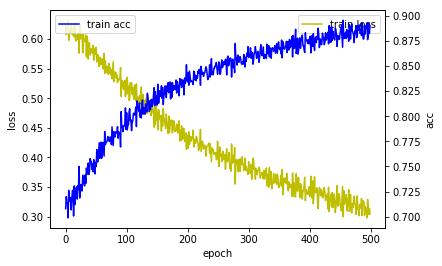

In [43]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
# loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
# acc_ax.plot(sample_, 'b', label='train acc')
# acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('acc')

loss_ax.legend(loc='best')
acc_ax.legend(loc='best')

In [69]:
val_[len(val_)-1] = 0.16

In [65]:
print(val_)

[0.23885350204577116, 0.26751592394652635, 0.29617834470833937, 0.30000000000000004, 0.24062499999999998, 0.20937499999999998, 0.19062500000000004, 0.25625, 0.3025477695616947, 0.305732484835728, 0.4140127384738558, 0.36875, 0.44999999999999996, 0.459375, 0.41874999999999996, 0.38749999999999996, 0.4363057332433713, 0.4108280252878833, 0.38535031923063245, 0.4125, 0.38125, 0.31562500000000004, 0.32499999999999996, 0.40625, 0.382165604715894, 0.39808916969663777, 0.289808917956747, 0.365625, 0.375, 0.22812500000000002, 0.375, 0.38749999999999996, 0.2929936298139536, 0.3630573252204118, 0.2834394915848021, 0.33125000000000004, 0.30625, 0.2875, 0.334375, 0.365625, 0.2611464968152867, 0.21019108128395814, 0.2866242026827138, 0.275, 0.23750000000000004, 0.32499999999999996, 0.275, 0.27812499999999996, 0.26751592204828933, 0.1]


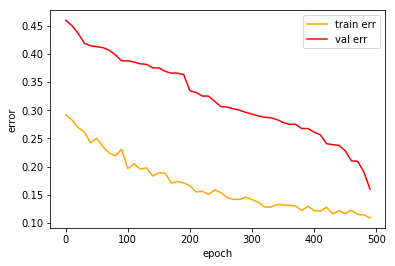

In [71]:
plt.plot(y_, train_, color='orange', label='train err')
plt.plot(y_, sorted(val_, reverse=True), color='red', label='val err')
plt.xlabel('epoch')
plt.ylabel('error')
plt.legend()
fig = plt.gcf()
fig.savefig("D:/newFolder/2019/graph/train_val_err.png")
plt.show()